In [5]:
import pandas as pd
import numpy as np
data=pd.read_csv(r"C:\Users\91852\OneDrive\Desktop\cl_input.csv")

In [6]:
data.head()

,0,1,2,3,4,5,6,7
0,-0.167936,-0.005548,0.149060,-0.185278,-0.620565,0.649526,0.620921,-0.342853
1,0.139032,-0.175757,0.004710,-0.218603,-0.182120,-0.086015,0.055800,0.015621
2,-0.198300,-0.571020,0.344419,-0.113230,-0.269252,0.278363,0.227463,0.703831
3,0.568143,0.469667,1.015514,0.045738,-0.317122,-0.565448,-0.160784,-0.821252
4,-0.167936,-0.005548,0.149060,-0.185278,-0.620565,0.649526,0.620921,-0.342853


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25567 entries, 0 to 25566
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       25567 non-null  float64
 1   1       25567 non-null  float64
 2   2       25567 non-null  float64
 3   3       25567 non-null  float64
 4   4       25567 non-null  float64
 5   5       25567 non-null  float64
 6   6       25567 non-null  float64
 7   7       25567 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


In [8]:
data.max()

0    1.403082
1    2.325456
2    1.559945
3    1.580160
4    1.125701
5    1.714089
6    1.939184
7    1.898617
dtype: float64

In [9]:
data.min()

0   -1.845253
1   -1.799696
2   -1.279297
3   -1.703893
4   -1.572272
5   -2.659828
6   -1.456086
7   -1.627792
dtype: float64

# Clustering

## DBSCAN

### selecting emp 

In [10]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [19]:
import time
st_time=time.time()
neighbors = NearestNeighbors(n_neighbors=100)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
end_time=time.time()


In [20]:
print(end_time-st_time)

2.3235270977020264


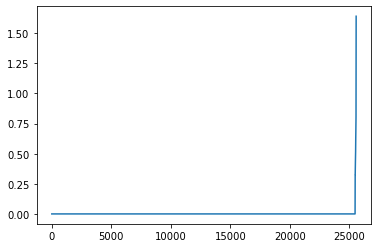

In [21]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [23]:
from sklearn.cluster import DBSCAN

In [27]:
st_time=time.time()
db = DBSCAN(eps=0.02, min_samples=100).fit(data)
sample_cores=np.zeros_like(labels,dtype=bool)
sample_cores[db.core_sample_indices_]=True
end_time=time.time()



In [28]:
print(end_time-st_time)

2.167396068572998


In [30]:
labels=db.labels_


In [31]:
from sklearn import metrics

print(metrics.silhouette_score(data,labels))

0.6840833885958427


In [32]:
n_clusters=len(set(labels))- (1 if -1 in labels else 0)
n_clusters

21

In [33]:
n_noise_ = list(labels).count(-1)


print("Estimated number of noise points: %d" % n_noise_)



Estimated number of noise points: 5604


In [34]:
l=list(labels)
cl_labels=[0] *n_clusters

In [35]:
for i in range(len(l)):
    if l[i]!=-1:
        cl_labels[l[i]]=cl_labels[l[i]]+1

In [36]:
for i in range(len(cl_labels)):
    print(i,"  ",cl_labels[i])
#cl_labels

0    320
1    162
2    184
3    129
4    131
5    108
6    108
7    2753
8    3357
9    153
10    112
11    117
12    8903
13    1153
14    231
15    231
16    230
17    231
18    231
19    231
20    888


##  T-SNE

In [37]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [38]:
model = TSNE(n_components = 2, random_state = 0)

In [39]:
st_time=time.time()
tsne_data = model.fit_transform(data)
end_time=time.time()

In [40]:
print(end_time-st_time)

176.8334882259369


In [41]:
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))

In [42]:
import seaborn

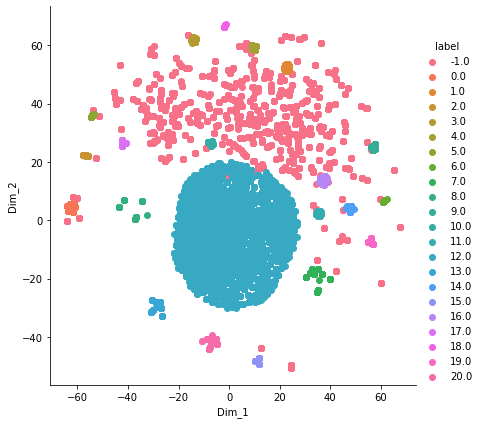

In [43]:
seaborn.FacetGrid(tsne_df, hue ="label", height = 6).map(
       plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
plt.show()

In [44]:
plt.savefig(r'C:\Users\91852\OneDrive\Desktop\Clusters.png')

<Figure size 432x288 with 0 Axes>